<a href="https://colab.research.google.com/github/95871abhinandankumar/95871abhinandankumar/blob/main/ML_assignment5_batch_gradient_descent_skitlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from sklearn import datasets
import pandas as pd


boston = datasets.load_boston(return_X_y=False)
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
print(boston_df)

        CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67   22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08   20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64   23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48   22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   7.88   11.9

[506 rows x 14 

In [56]:
train_dataset = boston_df.sample(frac=0.3)
dataframe = boston_df.drop(train_dataset.index)
validation_dataset = dataframe.sample(frac=(.1/.7))
test_dataset = dataframe.drop(validation_dataset.index)

print("train dataset\n", train_dataset)
# print("validation dataset\n", validation_dataset)
# print("test dataset\n", test_dataset)

train dataset
         CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
125  0.16902   0.0  25.65   0.0  0.581  ...  188.0     19.1  385.02  14.81   21.4
288  0.04590  52.5   5.32   0.0  0.405  ...  293.0     16.6  396.90   7.60   22.3
296  0.05372   0.0  13.92   0.0  0.437  ...  289.0     16.0  392.85   7.39   27.1
433  5.58107   0.0  18.10   0.0  0.713  ...  666.0     20.2  100.19  16.22   14.3
361  3.83684   0.0  18.10   0.0  0.770  ...  666.0     20.2  350.65  14.19   19.9
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...    ...
219  0.11425   0.0  13.89   1.0  0.550  ...  276.0     16.4  393.74  10.50   23.0
111  0.10084   0.0  10.01   0.0  0.547  ...  432.0     17.8  395.59  10.16   22.8
314  0.36920   0.0   9.90   0.0  0.544  ...  304.0     18.4  395.69   9.28   23.8
128  0.32543   0.0  21.89   0.0  0.624  ...  437.0     21.2  396.90  15.39   18.0
118  0.13058   0.0  10.01   0.0  0.547  ...  432.0     17.8  338.63  15.37   20.4



In [57]:
from sklearn import preprocessing
import numpy as np


In [58]:
def hypothesis(w, index, dataset):
  sample =dataset[index][:-1]
  sample = np.concatenate([[1], sample])
  array = np.multiply(w, sample)
  return np.sum(array)

In [59]:
# to calculate the predicted value with the help of hypothesis function
def predicted_values(w, dataset):
  predicted = []
  for i in range(len(dataset)):
    predicted.append(hypothesis(w, i, dataset))
  
  return np.array(predicted)


# to calculate mean square error
def MSE(predicted, actual):
  return np.square(np.subtract(predicted, actual)).mean()/2

In [60]:
# to update w using batch gradient decendent
def update_parameter(w, alpha, dataset):
  predicted = predicted_values(w, dataset)
  m = len(dataset)
  w[0] = w[0] - (alpha /m)*(np.sum(np.subtract(predicted, dataset[:, -1])))
  for i in range(1, len(w)):
    w[i] = w[i] - (alpha /m)*(np.sum(np.multiply(np.subtract(predicted, dataset[:, -1]), dataset[:, i-1])))
  return w

In [61]:
def linear_regression(epoch, alpha, rho, w, train_dataset):
  pre_MSE = 0
  curr_MSE = 0
  for itr in range(epoch):
    predicted = predicted_values(w, train_dataset)
    curr_MSE = MSE(predicted, train_dataset[:,-1])
    w = update_parameter(w, alpha, train_dataset)

    if abs(curr_MSE - pre_MSE) <= rho:
      break;
    pre_MSE = curr_MSE
  return w, curr_MSE

In [62]:

train = preprocessing.normalize(train_dataset.to_numpy())
validation = preprocessing.normalize(validation_dataset.to_numpy())
test = preprocessing.normalize(test_dataset.to_numpy())

print("train dataset after normalization...")
print(train, "\n\n\n\n")
print("validation dataset after normalization...")
print(validation, "\n\n\n\n")
print("test dataset after normalization...")
print(test)

train dataset after normalization...
[[3.84590394e-04 0.00000000e+00 5.83643569e-02 ... 8.76079715e-01
  3.36988743e-02 4.86938494e-02]
 [9.19467318e-05 1.05167831e-01 1.06570068e-02 ... 7.95068799e-01
  1.52242955e-02 4.46712880e-02]
 [1.09249627e-04 0.00000000e+00 2.83089129e-02 ... 7.98933652e-01
  1.50289416e-02 5.51128980e-02]
 ...
 [7.27186660e-04 0.00000000e+00 1.94993173e-02 ... 7.79362106e-01
  1.82781479e-02 4.68771466e-02]
 [5.42526027e-04 0.00000000e+00 3.64929316e-02 ... 6.61674032e-01
  2.56567482e-02 3.00078926e-02]
 [2.35371276e-04 0.00000000e+00 1.80430883e-02 ... 6.10382718e-01
  2.77045222e-02 3.67711291e-02]] 




validation dataset after normalization...
[[6.04500576e-03 0.00000000e+00 2.35457703e-02 0.00000000e+00
  7.98734969e-04 9.08008157e-03 8.79388988e-02 3.29497688e-03
  3.12209108e-02 8.66380276e-01 2.62775999e-02 4.87410453e-01
  1.51681592e-02 3.87659643e-02]
 [4.06647704e-05 1.54103976e-01 3.79189177e-03 0.00000000e+00
  7.75189697e-04 1.42149243e-02 2.9

In [63]:
trains_MSE=[]
validations_MSE =[]
w=[1 for _ in range(14)]
for i in range(1, 100):
  w=[1 for _ in range(14)]
  w, mse = linear_regression(i, 0.1, 0.001, w, train)
  trains_MSE.append(mse)
  predicted = predicted_values(w, validation)
  validations_MSE.append(MSE(predicted, validation[:,-1]))

print(trains_MSE)
print(validations_MSE)
predicted = predicted_values(w, test)
test_MSE = MSE(predicted, test[:,-1])
print(test_MSE)



[3.2774123368489523, 2.138166569921674, 1.3950531256195, 0.9103310121941285, 0.5941537916298687, 0.38791594409091873, 0.25338994457929137, 0.16564053662825118, 0.10840281647814365, 0.07106742486034172, 0.04671403161155922, 0.0308286063972254, 0.020466713131102595, 0.013707739140395005, 0.009298896817940897, 0.0064230110972117085, 0.004547050612359998, 0.0033233267852354627, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.0025250474322550402, 0.

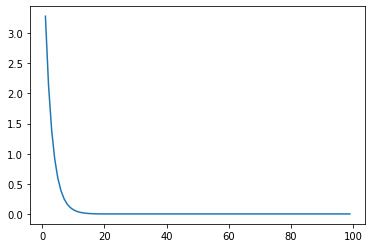

In [64]:
import matplotlib.pyplot as plt

# print(trains_MSE1)
epoch = [i+1 for i in range(len(trains_MSE))]
plt.plot(epoch, trains_MSE)

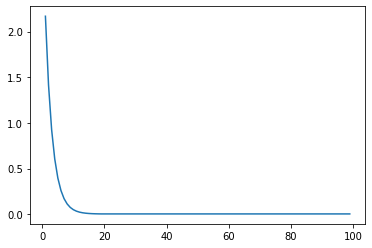

In [65]:
plt.plot(epoch, validations_MSE)

In [66]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(np.delete(train, -1, 1),  train[:,-1])


from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(train[:,-1], reg.predict(np.delete(train, -1, 1)), sample_weight=None)
mse_validation = mean_squared_error(validation[:,-1], reg.predict(np.delete(validation, -1, 1)), sample_weight=None)
mse_test = mean_squared_error(test[:,-1], reg.predict(np.delete(test, -1, 1)), sample_weight=None)
print("train_mse", mse_train)
print("validation mse", mse_validation)
print("test_mse", mse_test)

train_mse 5.717922137682838e-05
validation mse 0.00012231785774215268
test_mse 7.223464275372289e-05


In [67]:
train_UN = train_dataset.to_numpy()
validation_UN = validation_dataset.to_numpy()
test_UN = test_dataset.to_numpy()

trains_MSE=[]
validations_MSE =[]
w=[1 for _ in range(14)]
for i in range(1, 100):
  w=[1 for _ in range(14)]
  w, mse = linear_regression(i, 0.0000001, 0.001, w, train_UN)
  trains_MSE.append(mse)
  predicted = predicted_values(w, validation_UN)
  validations_MSE.append(MSE(predicted, validation_UN[:,-1]))

print(trains_MSE)
print(validations_MSE)
predicted = predicted_values(w, test_UN)
test_MSE = MSE(predicted, test_UN[:,-1])
print(test_MSE)

[417244.11242627277, 391141.8010352887, 366674.159429641, 343738.8136656131, 322239.801149251, 302087.1691141673, 283196.59824538964, 265489.0498744361, 248890.43526942568, 233331.30563648662, 218746.56153537775, 205075.18049347366, 192259.96167841047, 180247.28656106067, 168986.8945674164, 158431.6727806724, 148537.45881359116, 139262.8560263369, 130569.06031662204, 122419.69775742905, 114780.67240295949, 107620.02362600615, 100907.79238982673, 94615.89589497929, 88718.01007662302, 83189.45946063496, 78007.1139176834, 73149.29188326134, 68595.66963873779, 64327.19627384481, 60326.01397479019, 56575.383304468945, 53059.61316213496, 49763.99512947259, 46674.74192836261, 43778.9297328402, 41064.44409386923, 38519.92925067387, 36134.740616538365, 33898.900240268165, 31803.055056956433, 29838.437753370523, 27996.830084213496, 26270.52848576996, 24652.311843058535, 23135.411275623967, 21713.48181554762, 20380.575859173106, 19131.11828146484, 17959.883108874175, 16861.971653108896, 15832.792

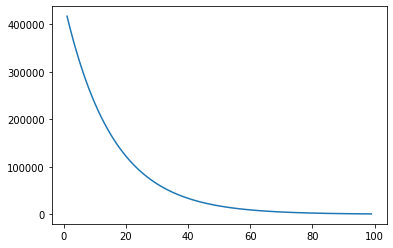

In [68]:
epoch = [i+1 for i in range(len(trains_MSE))]
plt.plot(epoch, trains_MSE)

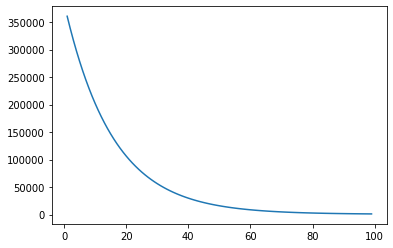

In [69]:
plt.plot(epoch, validations_MSE)

In [70]:
# when dataset is not normalized

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(np.delete(train_UN, -1, 1),  train_UN[:,-1])


from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(train_UN[:,-1], reg.predict(np.delete(train_UN, -1, 1)), sample_weight=None)
mse_validation = mean_squared_error(validation_UN[:,-1], reg.predict(np.delete(validation_UN, -1, 1)), sample_weight=None)
mse_test = mean_squared_error(test_UN[:,-1], reg.predict(np.delete(test_UN, -1, 1)), sample_weight=None)
print("train_mse", mse_train)
print("validation mse", mse_validation)
print("test_mse", mse_test)

train_mse 22.176818032011543
validation mse 44.273562777040254
test_mse 26.87760440040289
